In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score, confusion_matrix


## Pre Processing

In [3]:
file= open('userprofile.csv', mode='r', encoding='utf-8', errors='ignore')
training_data = pd.read_csv(file)
training_data["smoker"] = training_data.smoker.replace("?","false")
training_data["smoker"] = (training_data.smoker == "true") * 1

In [4]:
training_data.drop(training_data.index[training_data['dress_preference'] == "?"], inplace = True)
hot_dress_preference = pd.get_dummies(training_data['dress_preference'],prefix='dress_preference')
del training_data['dress_preference']
training_data = pd.concat([training_data, hot_dress_preference], axis=1, sort=False)
del training_data['latitude']
del training_data['longitude']
del training_data['interest']
del training_data['personality']
del training_data['color']
del training_data['religion']
del training_data['weight']
del training_data['height']
del training_data['birth_year']

In [5]:
hot_drink_level = pd.get_dummies(training_data['drink_level'],prefix='drink_level')
del training_data['drink_level']
training_data = pd.concat([training_data, hot_drink_level], axis=1, sort=False)

In [6]:
training_data.drop(training_data.index[training_data['transport'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['ambience'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['hijos'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['activity'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['budget'] == "?"], inplace = True)
training_data.drop(training_data.index[training_data['marital_status'] == "?"], inplace = True)

In [7]:
hot_ambience = pd.get_dummies(training_data['ambience'],prefix='ambience')
del training_data['ambience']
training_data = pd.concat([training_data, hot_ambience], axis=1, sort=False)

In [8]:
hot_transport = pd.get_dummies(training_data['transport'],prefix='transport')
del training_data['transport']
training_data = pd.concat([training_data, hot_transport], axis=1, sort=False)

In [9]:
hot_hijos = pd.get_dummies(training_data['hijos'],prefix='hijos')
del training_data['hijos']
training_data = pd.concat([training_data, hot_hijos], axis=1, sort=False)

In [10]:
hot_activity = pd.get_dummies(training_data['activity'],prefix='activity')
del training_data['activity']
training_data = pd.concat([training_data, hot_activity], axis=1, sort=False)

In [11]:
hot_budget = pd.get_dummies(training_data['budget'],prefix='budget')
del training_data['budget']
training_data = pd.concat([training_data, hot_budget], axis=1, sort=False)

In [12]:
hot_marital_status = pd.get_dummies(training_data['marital_status'],prefix='marital_status')
del training_data['marital_status']
training_data = pd.concat([training_data, hot_marital_status], axis=1, sort=False)

In [13]:
training_data.to_csv("binaryzed_users.csv")

In [14]:
file= open('userpayment.csv', mode='r', encoding='utf-8', errors='ignore')
userpayment = pd.read_csv(file)
userpayment["Upayment"] = userpayment.Upayment.replace("cash","0")
userpayment["Upayment"] = userpayment.Upayment.replace("?","0")
userpayment["Upayment"] = userpayment.Upayment.replace("VISA","1")
userpayment["Upayment"] = userpayment.Upayment.replace("American_Express","1")
userpayment["Upayment"] = userpayment.Upayment.replace("MasterCard-Eurocard","1")
userpayment["Upayment"] = userpayment.Upayment.replace("bank_debit_cards","2")
userpayment.to_csv("userpayment_numerical.csv")

In [15]:
file= open('chefmozparking.csv', mode='r', encoding='utf-8', errors='ignore')
parking_data = pd.read_csv(file)
pd.get_dummies(parking_data['parking_lot'],prefix='parking_lot')
parking_data["parking_lot"] = parking_data.parking_lot.replace("fee","1")
parking_data["parking_lot"] = parking_data.parking_lot.replace("none","0")
parking_data["parking_lot"] = parking_data.parking_lot.replace("public","1")
parking_data["parking_lot"] = parking_data.parking_lot.replace("street","1")
parking_data["parking_lot"] = parking_data.parking_lot.replace("valet parking","1")
parking_data["parking_lot"] = parking_data.parking_lot.replace("validated parking","1")
parking_data["parking_lot"] = parking_data.parking_lot.replace("yes","1")
parking_data.to_csv("parking_data_numerical.csv")

In [16]:
file= open('usercuisine.csv', mode='r', encoding='utf-8', errors='ignore')
usercuisine = pd.read_csv(file)
pd.get_dummies(usercuisine['Rcuisine'],prefix='Rcuisine')
usercuisine.to_csv("usercuisine_numerical.csv")

In [17]:
file= open('rating_final.csv', mode='r', encoding='utf-8', errors='ignore')
rating_final = pd.read_csv(file)

## Correlation Matrix analysis

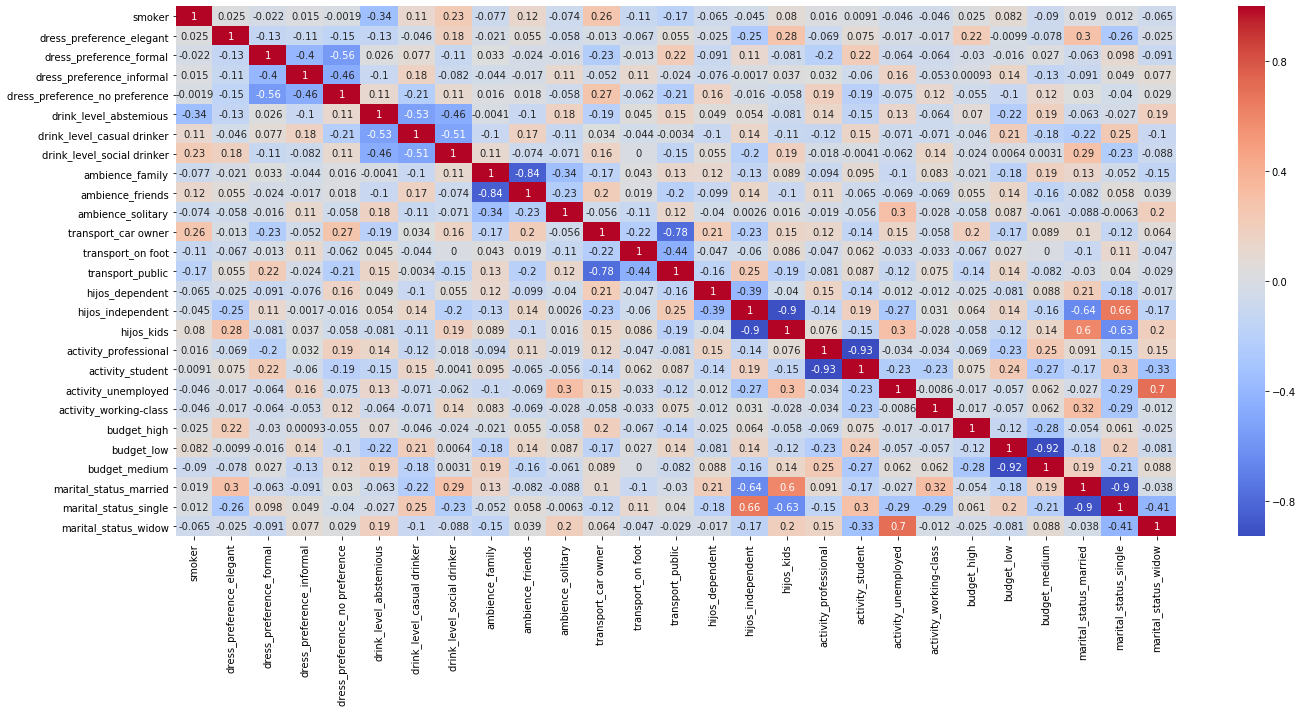

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(training_data.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

## Silhouette analysis

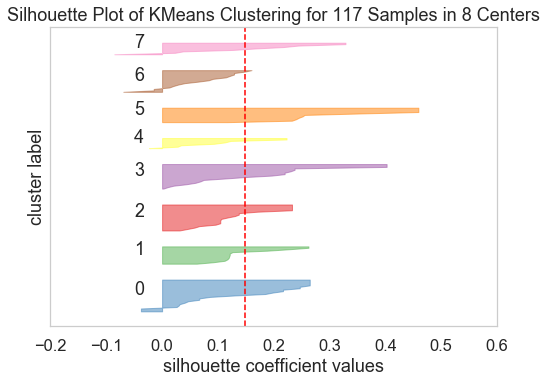

In [83]:
# from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model)

visualizer.fit(training_data[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']])    # Fit the data to the visualizer
visualizer.poof() 

## Labeling goups on users

In [89]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(training_data[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']])

training_data['group'] = kmeans.labels_

## PCA Ploting Image

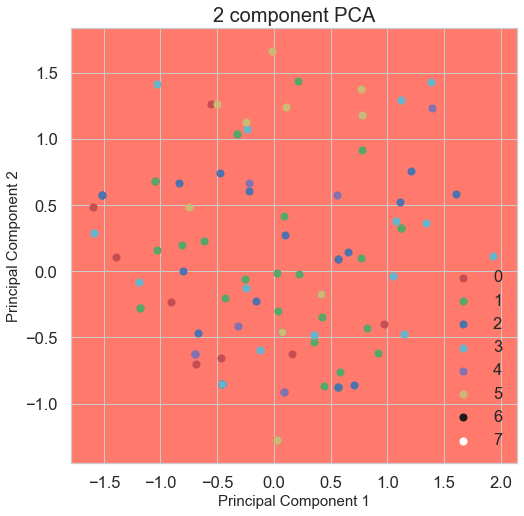

In [85]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(training_data[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']])

X = pca.transform(training_data[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']])

y = training_data['group']

principalDf = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])
principalDf = pd.concat([principalDf,y],axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_facecolor('xkcd:salmon')
targets = list(range(0,8))
colors = ['r', 'g', 'b','c','m','y','k','w']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['group'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Grid SearchCV on KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    training_data[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']],     training_data['group'], test_size=0.33, random_state=42)

clf = KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [3,5,7,9,11,13,15,21,23,47],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan','minkowski'],
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5,verbose=1,n_jobs=-1)
CV_clf.fit(X_train, y_train)
CV_clf.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.8s finished
/home/teknus/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

## Metrics function

In [86]:
def show_metrics_test(y_test, y_pred_test):
    print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))
    print("F1 score test {}".format(f1_score(y_test,y_pred_test,average='macro')))
    print("Precision score test {}".format(precision_score(y_test,y_pred_test,average='macro')))
    print("Recall score test {}".format(recall_score(y_test,y_pred_test,average='macro')))
    print("Confusion Matrix score test {}".format(confusion_matrix(y_test,y_pred_test)))

def show_metrics_train(y_train,y_pred_train):
    print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
    print("F1 score train {}".format(f1_score(y_train,y_pred_train,average='macro')))
    print("Precision score train {}".format(precision_score(y_train,y_pred_train,average='macro')))
    print("Recall score train {}".format(recall_score(y_train,y_pred_train,average='macro')))
    print("Confusion Matrix score train {}".format(confusion_matrix(y_train,y_pred_train)))

def show_curve(clf,X_train, y_train, X_test, y_test):
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid", {'axes.grid' : False})

    scores_train = clf.predict_proba(X_train)
    scores_test = clf.predict_proba(X_test)

    y_scores_train = []
    y_scores_test = []
    for i in range(len(scores_train)):
        y_scores_train.append(scores_train[i][1])

    for i in range(len(scores_test)):
        y_scores_test.append(scores_test[i][1])

    fpr_dt_train, tpr_dt_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
    fpr_dt_test, tpr_dt_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

    plt.plot(fpr_dt_train, tpr_dt_train, color='darkblue', label='Train AUC: %2f' %auc(fpr_dt_train, tpr_dt_train))
    plt.plot(fpr_dt_test, tpr_dt_test, color='red', ls='--', label='Test AUC: %2f' %auc(fpr_dt_test, tpr_dt_test))
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc='lower right')

Trainig Accuracy: 1.00000
F1 score train 1.0
Precision score train 1.0
Recall score train 1.0
Confusion Matrix score train [[16  0  0  0  0  0]
 [ 0 22  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 10]]
Test Accuracy: 0.87179
F1 score test 0.798773690078038
Precision score test 0.8782051282051282
Recall score test 0.8303571428571429
Confusion Matrix score test [[ 6  1  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  1  0  0  1  2]
 [ 0  0  0  0  0  2]]


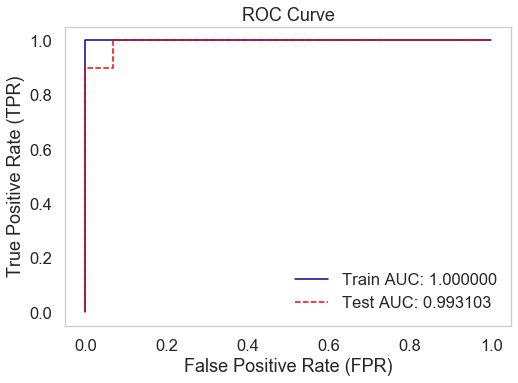

In [90]:
from sklearn.externals import joblib

clf = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 11, weights= 'distance')
clf = clf.fit(X_train[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']], y_train)
joblib.dump(clf, "GropClassificator.pkl")
y_pred_train = clf.predict(X_train[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']])
y_pred_test = clf.predict(X_test[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']])
show_metrics_train(y_train, y_pred_train)
show_metrics_test(y_test, y_pred_test)
show_curve(clf,X_train[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']], y_train, X_test[['smoker', 'dress_preference_elegant',
           'dress_preference_formal', 'dress_preference_informal',
           'dress_preference_no preference', 'drink_level_abstemious',
           'drink_level_casual drinker', 'drink_level_social drinker',
           'ambience_family', 'ambience_friends', 'ambience_solitary',
           'transport_car owner', 'transport_on foot', 'transport_public',
           'hijos_dependent', 'hijos_independent', 'hijos_kids',
           'activity_professional', 'activity_student', 'activity_unemployed',
           'activity_working-class', 'budget_high', 'budget_low', 'budget_medium',
           'marital_status_married', 'marital_status_single',
           'marital_status_widow']], y_test)

### Get Restaurants from a group

In [94]:
file= open('geoplaces2.csv', mode='r', encoding='utf-8', errors='ignore')
geoplaces2 = pd.read_csv(file)

In [124]:
restaurants = set()
ratings = list()
items = [0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0]
item_g = clf.predict([np.array(items)])[0]
for id in training_data[training_data.group == item_g].userID:
     for el in rating_final.values:
            if el[0] == id:
                if el[2] + el[3] +el[4] != 0:
                    restaurants.add((el[0],el[1],el[2],el[3],el[4]))
restaurants = list(restaurants)
response = set()
for g in geoplaces2.values:
    for r in restaurants:
        if g[0] == r[1]:
            response.add((g[4],g[5],r[2],r[3],r[4]))
response = list(response)
response.sort(key=lambda i: -1 * (i[2] + i[3] + i[4]))
print(list(response))

[('Restaurante la Cantina', 'De La Estrella 2005 Estrella de Oriente', 2, 2, 2), ('Tortas Locas Hipocampo', 'Venustiano Carranza 719 Centro', 2, 2, 2), ('Carls Jr', 'Av. V. Carranza', 2, 2, 2), ('la Cantina', 'Capitan Caldera No. 420 Tequisqueapan', 2, 2, 2), ('cafe punta del cielo', '?', 2, 2, 2), ('Preambulo Wifi Zone Cafe', 'Anahuac 805', 2, 2, 2), ('Vips', 'Emiliano Zapata No. 825 Tlaltenongo', 2, 2, 2), ('Restaurante la Gran Via', 'Venustiano Carranza 560 Centro', 2, 2, 2), ('Sirlone', 'carr. mexico', 2, 2, 2), ('Sushi Itto', 'Venustiano Carranza 1809 C Polanco', 2, 2, 2), ('La Posada del Virrey', 'Av. V. Carranza', 2, 2, 2), ('Mariscos Tia Licha', 'avenida salvador montiel ', 2, 2, 2), ('El Mundo de la Pasta', 'Rio Papaloapan 265 Lomas de San Luis (3)', 2, 2, 2), ('Cabana Huasteca', 'Cuauhtemoc 455', 2, 2, 2), ('Mariscos El Pescador', 'Himno Nacional 2104 Tangamanga', 2, 2, 1), ('Log Yin', '?', 2, 2, 1), ('Gorditas Dona Tota', 'Zaragoza entre Francisco Zarco y Lopez Velarde', 2, 